In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
from xclib.data import data_utils
import numpy as np
import time
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone

In [2]:
#Change this later. Make the path as command line argument
X_train = data_utils.read_sparse_file('ass3_parta_data/train_x.txt', force_header=True)
train_class = np.genfromtxt('ass3_parta_data/train_y.txt').reshape(-1, 1)

X_valid = data_utils.read_sparse_file('ass3_parta_data/valid_x.txt', force_header=True)
valid_class = np.genfromtxt('ass3_parta_data/valid_y.txt').reshape(-1, 1)

X_test = data_utils.read_sparse_file('ass3_parta_data/test_x.txt', force_header=True)
test_class = np.genfromtxt('ass3_parta_data/test_y.txt').reshape(-1, 1)

/home/ayushi/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [3]:
f = open('ass3_parta_data/train_x.txt') 
m,n = f.readlines()[0].rstrip("\n").split(" ")
m,n = int(m),int(n)
f.close()

In [4]:
classes = np.unique(train_class)
pos_class_ind = np.where(train_class == 1)
neg_class_ind = np.where(train_class == 0)

In [5]:
attributes = np.array(range(X_train.A.shape[1]))

In [6]:
X_train

<64713x482 sparse matrix of type '<class 'numpy.float32'>'
	with 3545452 stored elements in Compressed Sparse Row format>

## Experiment with a) n_estimators (50 to 450 in range of 100)

In [72]:
ne_rf = []
n_estimator = [x for x in range(50, 451, 100)]
ne_train_acc = []
ne_val_acc = []
ne_test_acc = []

for n_esti in n_estimator:
    ne_rf.append(RandomForestClassifier(n_estimators=n_esti, criterion="entropy", n_jobs=6))

In [73]:
for i in range(len(ne_rf)):
    ne_rf[i].fit(X_train.A, train_class.ravel())
    ne_train_acc.append(ne_rf[i].score(X_train.A, train_class.ravel()))
    ne_val_acc.append(ne_rf[i].score(X_valid.A, valid_class.ravel()))
    ne_test_acc.append(ne_rf[i].score(X_test.A, test_class.ravel()))

In [74]:
ne_train_acc = [x*100 for x in ne_train_acc]
ne_val_acc = [x*100 for x in ne_val_acc]
ne_test_acc = [x*100 for x in ne_test_acc]

#### Max_depth = Full Trees

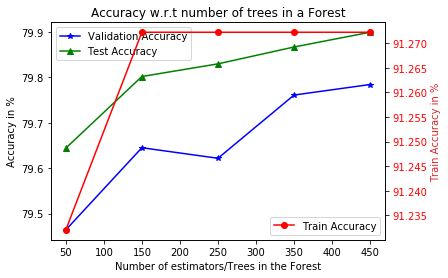

In [155]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(n_estimator, ne_val_acc, marker="*", c='b', label="Validation Accuracy")
ax1.plot(n_estimator, ne_test_acc, marker='^', c='g',label="Test Accuracy")
ax1.set_xlabel("Number of estimators/Trees in the Forest")
ax1.set_ylabel("Accuracy in %")
plt.legend(loc=2)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Train Accuracy in %", color=color)
ax2.plot(n_estimator, ne_train_acc, marker='o', c='r',label="Train Accuracy")
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Accuracy w.r.t number of trees in a Forest")
plt.legend()
#plt.savefig("plots/n-estimators-full-depth.png", dpi = 1000, bbox_inches='tight')
#plt.show()

#### Max_depth = 14

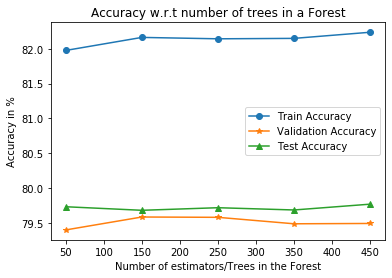

In [71]:
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.plot(n_estimator, ne_train_acc, marker='o', label="Train Accuracy")
ax.plot(n_estimator, ne_val_acc, marker="*", label="Validation Accuracy")
ax.plot(n_estimator, ne_test_acc, marker='^', label="Test Accuracy")

ax.set_xlabel("Number of estimators/Trees in the Forest")
ax.set_ylabel("Accuracy in %")
ax.set_title("Accuracy w.r.t number of trees in a Forest")
#ax.set_ylim(bottom=0.79)
plt.legend()
#plt.savefig("plots/n-estimators-depth-14.png", dpi = 1000, bbox_inches='tight')
#plt.show()

## Experiment with b) max_features (0.1 to 1.0 in range of 0.2) - Dropout
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

We will use these parameters -

max_features - use [0.1, 0.3, 0.5, 0.7, 0.9]

estimators = 450 #Choden from the previous experiment
criterion = "entropy"
max_depth = 14 (default = None) (#this is based on our results)
min_samples_split - 2 (default)
mini_samples_leaf - 1 (dafault)
bootstrap = True (Default)
oob_score = False (default) - Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs = 6 
ccp_alpha = cost complexity pruning - default = 0.0 i.e no pruning is performed


In [106]:
mf_rf = []
max_fea = [np.round(x,2) for x in np.arange(0.1, 1.0, 0.2)]
mf_train_acc = []
mf_val_acc = []
mf_test_acc = []

for mf in max_fea:
    mf_rf.append(RandomForestClassifier(n_estimators=450, max_features=mf, criterion="entropy", n_jobs=6))

In [107]:
for i in range(len(mf_rf)):
    mf_rf[i].fit(X_train.A, train_class.ravel())
    mf_train_acc.append(mf_rf[i].score(X_train.A, train_class.ravel()))
    mf_val_acc.append(mf_rf[i].score(X_valid.A, valid_class.ravel()))
    mf_test_acc.append(mf_rf[i].score(X_test.A, test_class.ravel()))

In [120]:
max_feature = [x*mf_rf[0].n_features_ for x in max_fea]

In [118]:
mf_train_acc = [x*100 for x in mf_train_acc]
mf_val_acc = [x*100 for x in mf_val_acc]
mf_test_acc = [x*100 for x in mf_test_acc]

#### Max_features exploration Graph with entropy and 450 number of estimators. 

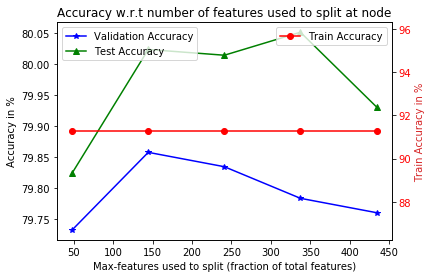

In [129]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(max_feature, mf_val_acc, marker="*", c='b', label="Validation Accuracy")
ax1.plot(max_feature, mf_test_acc, marker='^', c='g',label="Test Accuracy")
ax1.set_xlabel("Max-features used to split (fraction of total features)")
ax1.set_ylabel("Accuracy in %")
plt.legend(loc=2)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Train Accuracy in %", color=color)
ax2.plot(max_feature, mf_train_acc, marker='o', c='r',label="Train Accuracy")
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Accuracy w.r.t number of features used to split at node")
plt.legend()
#plt.savefig("plots/max_featuretures.png", dpi = 1000, bbox_inches='tight')
#plt.show()

## Experiment with c) min_sample_split (2 to 10 in range of 2) - Number of leaf
default - 2
If int, then consider min_samples_split as the minimum number.

If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

We will use these parameters -

min_sample_split = [x for x in range(2, 10, 2)]

estimators = 450 #Chosen from the previous experiment
criterion = "entropy"
max_features = auto (default)
max_depth = 14 (default = None) (#this is based on our results)
min_samples_split - 2 (default)
mini_samples_leaf - 1 (dafault)
bootstrap = True (Default)
oob_score = False (default) - Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs = 6 
ccp_alpha = cost complexity pruning - default = 0.0 i.e no pruning is performed


In [137]:
mss_rf = []
mss = [x for x in range(2, 11, 2)]
mss_train_acc = []
mss_val_acc = []
mss_test_acc = []

for m in mss:
    mss_rf.append(RandomForestClassifier(n_estimators=450, min_samples_split=m, criterion="entropy", n_jobs=6))

In [140]:
for i in range(len(mss_rf)):
    mss_rf[i].fit(X_train.A, train_class.ravel())
    mss_train_acc.append(mss_rf[i].score(X_train.A, train_class.ravel()))
    mss_val_acc.append(mss_rf[i].score(X_valid.A, valid_class.ravel()))
    mss_test_acc.append(mss_rf[i].score(X_test.A, test_class.ravel()))

In [141]:
mss_train_acc = [x*100 for x in mss_train_acc]
mss_val_acc = [x*100 for x in mss_val_acc]
mss_test_acc = [x*100 for x in mss_test_acc]

#### min_samples_split exploration Graph with entropy and 450 number of estimators. sqrt(max_features)

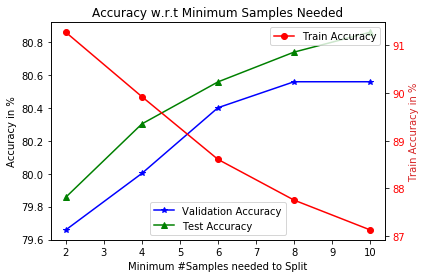

In [152]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.plot(mss, mss_val_acc, marker="*", c='b', label="Validation Accuracy")
ax1.plot(mss, mss_test_acc, marker='^', c='g',label="Test Accuracy")
ax1.set_xlabel("Minimum #Samples needed to Split")
ax1.set_ylabel("Accuracy in %")
plt.legend(loc=8)

color = 'tab:red'
ax2 = ax1.twinx()
ax2.set_ylabel("Train Accuracy in %", color=color)
ax2.plot(mss, mss_train_acc, marker='o', c='r',label="Train Accuracy")
ax2.tick_params(axis='y', labelcolor='red')
plt.title("Accuracy w.r.t Minimum Samples Needed")
plt.legend(loc=0)
#plt.savefig("plots/min_samples.png", dpi = 1000, bbox_inches='tight')
#plt.show()

## Experiment with d) RandomState - use integer random seeds either (0 or 42)
Default  = None - Use global random state from np.random

Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). 

In [176]:
rand_rf = []
ran = [0,42]
rand_train_acc = []
rand_val_acc = []
rand_test_acc = []


for r in ran:
    rand_rf.append(RandomForestClassifier(n_estimators=450, random_state=r, criterion="entropy", n_jobs=6))

In [178]:
for i in range(len(rand_rf)):
    rand_rf[i].fit(X_train.A, train_class.ravel())
    rand_train_acc.append(rand_rf[i].score(X_train.A, train_class.ravel()))
    rand_val_acc.append(rand_rf[i].score(X_valid.A, valid_class.ravel()))
    rand_test_acc.append(rand_rf[i].score(X_test.A, test_class.ravel()))

In [180]:
rand_train_acc = [x*100 for x in rand_train_acc]
rand_val_acc = [x*100 for x in rand_val_acc]
rand_test_acc = [x*100 for x in rand_test_acc]

#### random state exploration Graph with entropy and 450 number of estimators. sqrt(max_features)

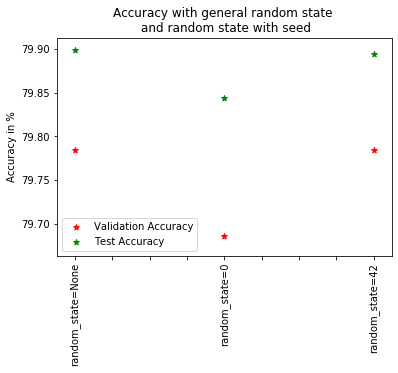

In [186]:
fig = plt.figure(1)
x = [x for x in range(3)]
lab = [" ","random_state=None", "","","", "random_state=0", "", "", "", "random_state=42"]
ax1 = fig.add_subplot(111)

#ax1.scatter(x, [ne_train_acc[-1], rand_train_acc[0], rand_train_acc[1]], marker="*", c='b', label="Train Accuracy")
ax1.scatter(x, [ne_val_acc[-1], rand_val_acc[0], rand_val_acc[1]], marker="*", c='r', label="Validation Accuracy")
ax1.scatter(x, [ne_test_acc[-1], rand_test_acc[0], rand_test_acc[1]], marker="*", c='g', label="Test Accuracy")
ax1.set_xticklabels(lab, rotation=90)
ax1.set_ylabel("Accuracy in %")
plt.title("Accuracy with general random state \n and random state with seed")
plt.legend()
#plt.savefig("plots/random_state.png", dpi = 1000, bbox_inches='tight')
#plt.show()

## Using Out of Bag Error and Doing Grid Search
oob_score bool (default=False)

Whether to use out-of-bag samples to estimate the generalization accuracy.

In [10]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[x for x in range(50,451,100)], 'max_features':[np.round(x,2) for x in np.arange(0.1,1.0,0.2)],
                                               'min_samples_split':[x for x in range(2,11,2)]}
rfc_search = RandomForestClassifier(oob_score=True)
start =time.time()
clf = GridSearchCV(rfc_search, parameters, cv=5, scoring='accuracy', n_jobs=7, verbose=3, refit=True)
clf.fit(X_train.A, train_class.ravel())

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
/home/ayushi/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:  4.6min
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed: 27.4min
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed: 113.4min
[Parallel(n_jobs=7)]: Done 498 tasks      | elapsed: 320.7min
[Parallel(n_jobs=7)]: Done 625 out of 625 | elapsed: 490.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=None,
                                 

In [11]:
print("Time taken to find best estimator={} sec".format(time.time()-start))

Time taken to find best estimator=48533.28649306297 sec


In [16]:
print(clf.best_params_)

{'max_features': 0.1, 'min_samples_split': 10, 'n_estimators': 350}


In [18]:
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)


In [19]:
clf.best_estimator_.fit(X_train.A, train_class.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
print(clf.best_estimator_.oob_score_)
print(clf.best_estimator_.oob_decision_function_)
print(clf.best_estimator_.score(X_train.A, train_class.ravel()))
print(clf.best_estimator_.score(X_valid.A, valid_class.ravel()))
print(clf.best_estimator_.score(X_test.A, test_class.ravel()))

0.810285414058999
[[1.         0.        ]
 [0.73851078 0.26148922]
 [0.94923298 0.05076702]
 ...
 [0.         1.        ]
 [0.03619743 0.96380257]
 [0.20500126 0.79499874]]
0.8736884397261756
0.8068792879658817
0.8072875620045431


# with Entropy - Parameter search

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[x for x in range(50,451,100)], 'max_features':[np.round(x,2) for x in np.arange(0.1,1.0,0.2)],
                                               'min_samples_split':[x for x in range(2,11,2)]}
rfc_search = RandomForestClassifier(criterion='entropy', oob_score=True)
start =time.time()
clf = GridSearchCV(rfc_search, parameters, cv=5, scoring='accuracy', n_jobs=7, verbose=3, refit=True)
clf.fit(X_train.A, train_class.ravel())

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
/home/ayushi/.local/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done  18 tasks      | elapsed:  4.8min
[Parallel(n_jobs=7)]: Done 114 tasks      | elapsed: 27.8min
[Parallel(n_jobs=7)]: Done 274 tasks      | elapsed: 112.6min
[Parallel(n_jobs=7)]: Done 498 tasks      | elapsed: 316.3min
[Parallel(n_jobs=7)]: Done 625 out of 625 | elapsed: 482.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, ran

In [25]:
print("Time taken to find best estimator={} sec".format(time.time()-start))

Time taken to find best estimator=28961.74004483223 sec


In [26]:
print(clf.best_params_)

{'max_features': 0.1, 'min_samples_split': 10, 'n_estimators': 150}


In [27]:
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)


In [28]:
clf.best_estimator_.fit(X_train.A, train_class.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
print(clf.best_estimator_.oob_score_)
print(clf.best_estimator_.oob_decision_function_)
print(clf.best_estimator_.score(X_train.A, train_class.ravel()))
print(clf.best_estimator_.score(X_valid.A, valid_class.ravel()))
print(clf.best_estimator_.score(X_test.A, test_class.ravel()))

0.8089719221794693
[[1.         0.        ]
 [0.72220718 0.27779282]
 [0.96641791 0.03358209]
 ...
 [0.         1.        ]
 [0.02438681 0.97561319]
 [0.17885542 0.82114458]]
0.8765008576329331
0.8055349527164843
0.8084928839645821


In [186]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

# Sensitivity Analysis (Part-D)

In [87]:
best_classifier = clone(clf.best_estimator_)

In [88]:
best_classifier.set_params(n_jobs=7)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=7,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

#### Sensitivity of the classifier to varying n_estimators (50 to 450 in range of 100) with others at optimum

max_features=0.1

min_samples_split = 10

In [52]:
ne_rf = []
n_estimator = [x for x in range(50, 451, 100)]
ne_train_acc = []
ne_val_acc = []
ne_test_acc = []

for n_esti in n_estimator:
    ne_rf.append(clone(best_classifier.set_params(n_estimators=n_esti)))

In [54]:
for i in range(len(ne_rf)):
    ne_rf[i].fit(X_train.A, train_class.ravel())
    ne_train_acc.append(ne_rf[i].score(X_train.A, train_class.ravel()))
    ne_val_acc.append(ne_rf[i].score(X_valid.A, valid_class.ravel()))
    ne_test_acc.append(ne_rf[i].score(X_test.A, test_class.ravel()))

In [101]:
ne_rf[4].oob_score_

0.8097600173071872

In [58]:
ne_train_acc = [x*100 for x in ne_train_acc]
ne_val_acc = [x*100 for x in ne_val_acc]
ne_test_acc = [x*100 for x in ne_test_acc]

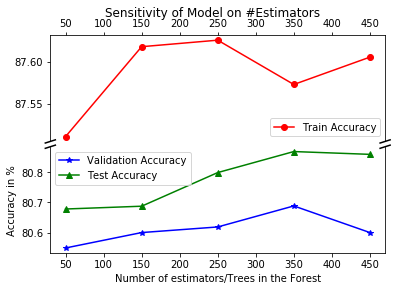

In [182]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(n_estimator, ne_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(n_estimator, ne_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Number of estimators/Trees in the Forest")
ax2.set_ylabel("Accuracy in %")

ax1.plot(n_estimator, ne_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

#This broken axis code taken from matplotlib library
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Sensitivity of Model on #Estimators")
plt.subplots_adjust(hspace=0.05)
#f.savefig("plots/partd/n-estimators-sensitivity.png", dpi = 1000)
#plt.show()

#### Sensitivity of Classifier to max_features (0.1 to 1.0 in range of 0.2) - Dropout

n_estimators=150

min_samples_split=10

In [87]:
best_classifier = clone(clf.best_estimator_)

In [88]:
best_classifier.set_params(n_jobs=7)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=7,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [67]:
mf_rf = []
max_fea = [np.round(x,2) for x in np.arange(0.1, 1.0, 0.2)]
mf_train_acc = []
mf_val_acc = []
mf_test_acc = []

for mf in max_fea:
    mf_rf.append(clone(best_classifier.set_params(max_features=mf)))    

In [69]:
for i in range(len(mf_rf)):
    mf_rf[i].fit(X_train.A, train_class.ravel())
    mf_train_acc.append(mf_rf[i].score(X_train.A, train_class.ravel()))
    mf_val_acc.append(mf_rf[i].score(X_valid.A, valid_class.ravel()))
    mf_test_acc.append(mf_rf[i].score(X_test.A, test_class.ravel()))

In [70]:
max_feature = [x*mf_rf[0].n_features_ for x in max_fea]

In [71]:
mf_train_acc = [x*100 for x in mf_train_acc]
mf_val_acc = [x*100 for x in mf_val_acc]
mf_test_acc = [x*100 for x in mf_test_acc]

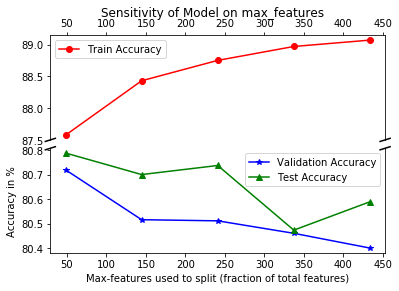

In [184]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(max_feature, mf_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(max_feature, mf_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Max-features used to split (fraction of total features)")
ax2.set_ylabel("Accuracy in %")

ax1.plot(max_feature, mf_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Sensitivity of Model on max_features")
plt.subplots_adjust(hspace=0.08)
#f.savefig("plots/partd/max_features_senstivity.png", dpi = 1000)
#plt.show()

#### Sensitivity of the classifier to changing min_sample_split (2 to 10 in range of 2) 

n_estimators = 150

max_features=0.1

In [87]:
best_classifier = clone(clf.best_estimator_)

In [88]:
best_classifier.set_params(n_jobs=7)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=7,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [89]:
mss_rf = []
mss = [x for x in range(2, 11, 2)]
mss_train_acc = []
mss_val_acc = []
mss_test_acc = []

for m in mss:
    mss_rf.append(clone(best_classifier.set_params(min_samples_split=m)))        

In [91]:
for i in range(len(mss_rf)):
    mss_rf[i].fit(X_train.A, train_class.ravel())
    mss_train_acc.append(mss_rf[i].score(X_train.A, train_class.ravel()))
    mss_val_acc.append(mss_rf[i].score(X_valid.A, valid_class.ravel()))
    mss_test_acc.append(mss_rf[i].score(X_test.A, test_class.ravel()))

In [92]:
mss_train_acc = [x*100 for x in mss_train_acc]
mss_val_acc = [x*100 for x in mss_val_acc]
mss_test_acc = [x*100 for x in mss_test_acc]

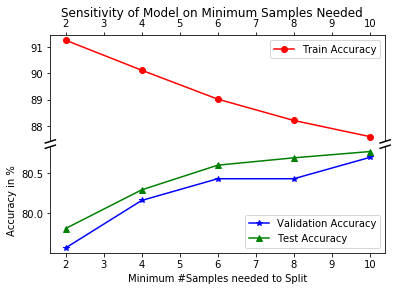

In [185]:
%matplotlib inline
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax2.plot(mss, mss_val_acc, marker="*", c='b', label="Validation Accuracy")
ax2.plot(mss, mss_test_acc, marker='^', c='g',label="Test Accuracy")
ax2.set_xlabel("Minimum #Samples needed to Split")
ax2.set_ylabel("Accuracy in %")

ax1.plot(mss, mss_train_acc, marker='o', c='r',label="Train Accuracy")
ax1.legend()

ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.legend()

plt.suptitle("Sensitivity of Model on Minimum Samples Needed")
plt.subplots_adjust(hspace=0.05)
#f.savefig("plots/partd/min_samples_senstivity.png", dpi = 1000)
#plt.show()